# Building Conventional Neural Network

This Project covers the following:

- Build neural network conveniently.
- Configure with different regularization methods: Dropout, l1 or l2 regulation.
- Fine tune pre-trained model to build your own projects.

# Dataset

This dataset is provided by our current research project, which utilize 20 kHz acoustic sensing to sense ASL gestures. All the 10 ASL words perform by 5 subjects. All images are generated by using the short-time Fourier transform (STFT) to calculate a spectrogram as the feature representation of the reflected near-ultrasound waves. Based on the Doppler effect, sign language gestures, including both hands and arms, will cause phase and frequency changes of the reflected sonic wave. The spectrogram contains information in both frequency and time domains. The spectrogram is also defined as the Power Spectral Density of the function:
\begin{equation}
    \textrm{spectrogram}\{x(t)\}(\tau,\omega)\equiv |X(\tau,\omega)|^{2}= \left| \sum^{\infty}_{n=-\infty}x[n]\omega[n-m]e^{-j\omega n}\right|^{2}
\end{equation}
where $x[n]$ is input signal, and $\omega[n-m]$ represents the overlapping Kaiser window function with an adjustable shape factor $\beta$ that improves the resolution and reduces the spectral leakage close to the sidelobes of the signal. The coefficients of the Kaiser window are computed as:
\begin{equation}
    \omega[n]=\frac{I_{0}\left(\beta\sqrt{1-\left(\frac{n-N/2}{N/2}\right)^{2}}\right)}{I_{0}(\beta)}, 0 \leq n \leq N
\end{equation}

This dataset has a training set of 5,000 examples, and a test set of 1,000 examples.

In [7]:
import sys

In [8]:
!{sys.executable} -m pip install tensorflow

In [9]:
!{sys.executable} -m pip install keras

In [10]:
import numpy as np
## please add the essential libraries

# YOUR CODE HERE
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers

## Part 1. loading dataset

We have splitted the dataset into training, validation and test. You can load every single folder to load dataset using keras ImageDataGenerator (10 points).

In [11]:
# load the file from our dataset including training, validation and testing part
img_width, img_height = 224, 224
train_data_dir      = 'Pictures/pictures/train'   #change this
validation_data_dir = 'Pictures/pictures/val'     #change this
test_data_dir       = 'Pictures/pictures/test'    #change this

epochs = 10   #50
batch_size = 128  #16    64 gives 0.7909482717514038

# # this is a generator that will read pictures found in 
# # subfolers of 'data/train', and indefinitely generate
# # batches of augmented image data
datagen = ImageDataGenerator(rescale=1./255)

# Your Code HERE
train_generator =datagen.flow_from_directory(train_data_dir, class_mode='categorical', batch_size=batch_size)
# valid_generator=datagen.flow_from_directory(validation_data_dir, class_mode='categorical', batch_size=batch_size,shuffle=True)
valid_generator=datagen.flow_from_directory(validation_data_dir, class_mode='categorical', batch_size=batch_size)
# test_generator=datagen.flow_from_directory(test_data_dir, class_mode='categorical', batch_size=batch_size,shuffle=True)
test_generator=datagen.flow_from_directory(test_data_dir, class_mode='categorical', batch_size=batch_size)

# please print the number of samples in each folder 
# Your Code HERE
print("Training dataset contains:",len(train_generator)*batch_size,"images")
print("Validation dataset contains:",len(valid_generator)*batch_size,"images")
print("Test dataset contains:",len(test_generator)*batch_size,"images")


Found 4176 images belonging to 10 classes.
Found 1392 images belonging to 10 classes.
Found 1392 images belonging to 10 classes.
Training dataset contains: 4224 images
Validation dataset contains: 1408 images
Test dataset contains: 1408 images


## Part 2.1 - Build your Neural Network and Train

Build a Convolutional Neural Network with 2 or 3 hidden layers without regularization methods, which includes Conv2D layer, activation Layer.

## Part 2.2 - Test 

Test your machine learning model on the testing set: After finishing all the above steps, fix your hyper-parameters(learning rate, number of neurons per layer) and model parameter and test your model’s performance on the testing set. This shows the effectiveness of your model’s generalization power gained by learning. For test dataset, the performance should be more than 80%.

In [18]:
# build conv2D CNN model, be careful with softmax and output layers is 10

# define the input shape of Convolutional Neural Network
# Your Code HERE
input_shape = (256,256,3) 

# define the Convolutional Neural Network
model = Sequential(
[
    keras.Input(shape=input_shape),
    layers.Conv2D(32,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128),
    layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 128)     

In [19]:
# Compiling the model and training including the files of compile and fit
#Your code 
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#Train the model with training and validation set
history=model.fit(train_generator,batch_size=batch_size,validation_data=valid_generator,epochs=epochs)

Epoch 1/10
33/33 [==============================] - 212s 6s/step - loss: 1.3362 - accuracy: 0.6260 - val_loss: 0.8895 - val_accuracy: 0.7601
Epoch 2/10
33/33 [==============================] - 243s 7s/step - loss: 0.0866 - accuracy: 0.9777 - val_loss: 0.8820 - val_accuracy: 0.8175
Epoch 3/10
33/33 [==============================] - 243s 7s/step - loss: 0.0100 - accuracy: 0.9978 - val_loss: 1.0538 - val_accuracy: 0.8247
Epoch 4/10
33/33 [==============================] - 248s 8s/step - loss: 0.0022 - accuracy: 0.9998 - val_loss: 1.0762 - val_accuracy: 0.8276
Epoch 5/10
33/33 [==============================] - 251s 8s/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 1.1805 - val_accuracy: 0.8376
Epoch 6/10
33/33 [==============================] - 252s 8s/step - loss: 0.0052 - accuracy: 0.9986 - val_loss: 1.1644 - val_accuracy: 0.8103
Epoch 7/10
33/33 [==============================] - 255s 8s/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 1.1722 - val_accuracy: 0.8190
Epoch 8/10
33

%Test

In [20]:
accuracy_hist=history.history["accuracy"]
loss_hist=history.history['loss']
val_acc_hist=history.history['val_accuracy']
val_loss_hist=history.history['val_loss']
# print(accuracy_hist)
# print(val_acc_hist)

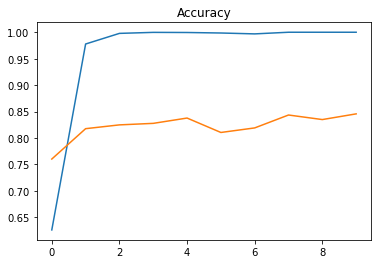

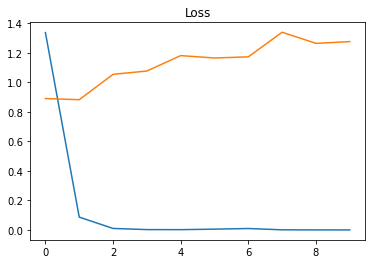

In [21]:
plt.plot(accuracy_hist,label='Train accuracy')
plt.plot(val_acc_hist,label='Validation accuracy')
plt.title("Accuracy")
plt.show()
plt.plot(loss_hist,label='Training loss')
plt.plot(val_loss_hist,label='Validation loss')
plt.title("Loss")
plt.show()

In [22]:
# Test the model on a testing dataset
# Your Code HERE
acc=model.evaluate(test_generator)
print("Accuracy on test data:",acc[1])
print("Loss on test data:",acc[0])

11/11 [==============================] - 24s 2s/step - loss: 1.3687 - accuracy: 0.8175
Accuracy on test data: 0.8175287246704102
Loss on test data: 1.3687400817871094


## Part 2.3 - L1 Regularization. Add L1 regularization setting in your Conv2D layer. Then, train your new model separately, and plot the training process including loss and accuracy.

In [83]:
# please redefine your model with setting the L1 Regularization in the layer of Conv 2D

# Your code HERE
model_l1 = Sequential(
[
    keras.Input(shape=input_shape),
    layers.Conv2D(32,kernel_size=(3,3),activation="relu",kernel_regularizer=regularizers.l1()),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu",kernel_regularizer=regularizers.l1()),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation="relu",kernel_regularizer=regularizers.l1()),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128),
    layers.Dense(10, activation="softmax"),
])

model_l1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 30, 30, 128)     

In [84]:
model_l1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#Train the model with training and validation set
history_l1=model_l1.fit(train_generator,batch_size=batch_size,validation_data=valid_generator,epochs=epochs)

Epoch 1/10
33/33 [==============================] - 261s 8s/step - loss: 23.4296 - accuracy: 0.5283 - val_loss: 15.2425 - val_accuracy: 0.7450
Epoch 2/10
33/33 [==============================] - 292s 9s/step - loss: 10.0409 - accuracy: 0.9262 - val_loss: 7.5198 - val_accuracy: 0.8182
Epoch 3/10
33/33 [==============================] - 290s 9s/step - loss: 5.1448 - accuracy: 0.9868 - val_loss: 4.8176 - val_accuracy: 0.8182
Epoch 4/10
33/33 [==============================] - 293s 9s/step - loss: 3.1524 - accuracy: 0.9933 - val_loss: 3.5799 - val_accuracy: 0.7866
Epoch 5/10
33/33 [==============================] - 296s 9s/step - loss: 2.0435 - accuracy: 0.9988 - val_loss: 2.5535 - val_accuracy: 0.8297
Epoch 6/10
33/33 [==============================] - 320s 10s/step - loss: 1.3739 - accuracy: 0.9995 - val_loss: 2.1050 - val_accuracy: 0.8168
Epoch 7/10
33/33 [==============================] - 319s 10s/step - loss: 0.9904 - accuracy: 1.0000 - val_loss: 1.8182 - val_accuracy: 0.7981
Epoch 8/

In [85]:
accuracy_hist_l1=model_l1.history.history["accuracy"]
loss_hist_l1=model_l1.history.history['loss']
val_acc_hist_l1=model_l1.history.history['val_accuracy']
val_loss_hist_l1=model_l1.history.history['val_loss']

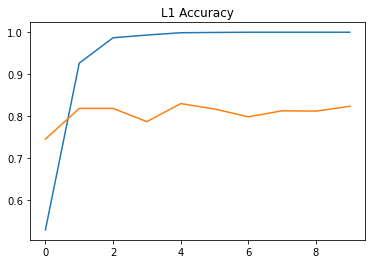

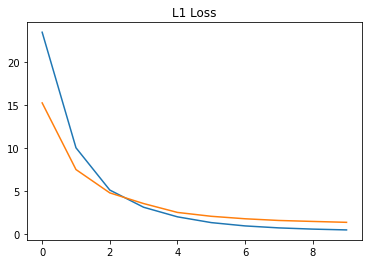

In [86]:
plt.plot(accuracy_hist_l1,label='Train accuracy')
plt.plot(val_acc_hist_l1,label='Validation accuracy')
plt.title("L1 Accuracy")
plt.show()
plt.plot(loss_hist_l1,label='Training loss')
plt.plot(val_loss_hist_l1,label='Validation loss')
plt.title("L1 Loss")
plt.show()

## Part 2.4 - L2 Regularization. Please add L2 regularization setting in your Conv2D layer. Then, train your new model separately, and plot the training process including loss and accuracy.

In [48]:
#please redefine your model and set the L2 Regularization in the layer of Conv 2D

# Your code HERE

model_l2 = Sequential(
[
    keras.Input(shape=input_shape),
    layers.Conv2D(32,kernel_size=(3,3),activation="relu",kernel_regularizer=regularizers.l2()),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu",kernel_regularizer=regularizers.l2()),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation="relu",kernel_regularizer=regularizers.l2()),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128),
    layers.Dense(10, activation="softmax"),
])

model_l2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 30, 30, 128)     

In [49]:
model_l2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history_l2=model_l2.fit(train_generator,batch_size=batch_size,validation_data=valid_generator,epochs=epochs)

Epoch 1/10
33/33 [==============================] - 233s 7s/step - loss: 3.2119 - accuracy: 0.5227 - val_loss: 1.8419 - val_accuracy: 0.7299
Epoch 2/10
33/33 [==============================] - 283s 9s/step - loss: 0.9864 - accuracy: 0.9325 - val_loss: 1.6172 - val_accuracy: 0.8103
Epoch 3/10
33/33 [==============================] - 290s 9s/step - loss: 0.6912 - accuracy: 0.9928 - val_loss: 1.7281 - val_accuracy: 0.8333
Epoch 4/10
33/33 [==============================] - 287s 9s/step - loss: 0.6069 - accuracy: 0.9981 - val_loss: 1.9147 - val_accuracy: 0.8060
Epoch 5/10
33/33 [==============================] - 304s 9s/step - loss: 0.5463 - accuracy: 0.9995 - val_loss: 1.7952 - val_accuracy: 0.8326
Epoch 6/10
33/33 [==============================] - 284s 9s/step - loss: 0.5011 - accuracy: 1.0000 - val_loss: 1.7291 - val_accuracy: 0.8420
Epoch 7/10
33/33 [==============================] - 288s 9s/step - loss: 0.4622 - accuracy: 1.0000 - val_loss: 1.7007 - val_accuracy: 0.8290
Epoch 8/10
33

In [50]:
accuracy_hist_l2=model_l2.history.history["accuracy"]
loss_hist_l2=model_l2.history.history['loss']
val_acc_hist_l2=model_l2.history.history['val_accuracy']
val_loss_hist_l2=model_l2.history.history['val_loss']

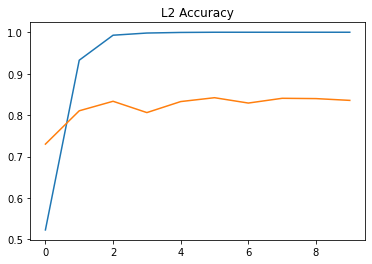

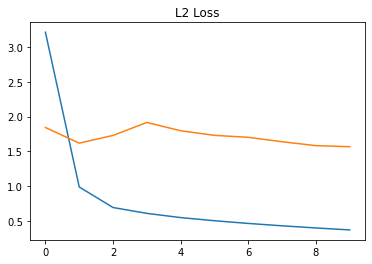

In [54]:
plt.plot(accuracy_hist_l2,label='Train accuracy')
plt.plot(val_acc_hist_l2,label='Validation accuracy')
plt.title("L2 Accuracy")
plt.show()
plt.plot(loss_hist_l2,label='Training loss')
plt.plot(val_loss_hist_l2,label='Validation loss')
plt.title("L2 Loss")
plt.show()

## Part3
1. Fine tune the well pre-trained model, Resnet 50, with different freeze layers. 
First,  load pre-trained resnet 50 from library.
Second, Fine-tune the model to fit our project, 10-classes.
Third,  freeze different layers, plot different training process with different frozen layers (at least three different layers).

In [18]:
# load pre-trained resnet 50 from libarary
# your Code HERE
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50

# Fine-tune the model to fit our project  
# your Code HERE
base = ResNet50(weights="imagenet", include_top=False,input_tensor=Input(shape=(256, 256, 3)))

top = base.output
top = MaxPooling2D(pool_size=(2, 2))(top)
top = Flatten(name="flatten")(top)
top = Dense(256, activation="relu")(top)
top = Dense(10, activation="softmax")(top)

model=Model(inputs=base.input,outputs=top)

In [19]:
for i in base.layers:
    print(i.name)

input_4
conv1_pad
conv1_conv
conv1_bn
conv1_relu
pool1_pad
pool1_pool
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_conv
conv2_block1_2_bn
conv2_block1_2_relu
conv2_block1_0_conv
conv2_block1_3_conv
conv2_block1_0_bn
conv2_block1_3_bn
conv2_block1_add
conv2_block1_out
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_conv
conv2_block2_2_bn
conv2_block2_2_relu
conv2_block2_3_conv
conv2_block2_3_bn
conv2_block2_add
conv2_block2_out
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_conv
conv2_block3_2_bn
conv2_block3_2_relu
conv2_block3_3_conv
conv2_block3_3_bn
conv2_block3_add
conv2_block3_out
conv3_block1_1_conv
conv3_block1_1_bn
conv3_block1_1_relu
conv3_block1_2_conv
conv3_block1_2_bn
conv3_block1_2_relu
conv3_block1_0_conv
conv3_block1_3_conv
conv3_block1_0_bn
conv3_block1_3_bn
conv3_block1_add
conv3_block1_out
conv3_block2_1_conv
conv3_block2_1_bn
conv3_block2_1_relu
conv3_block2_2_conv
conv3_block2_2_bn
conv3_

In [ ]:
# define the freeze layers 
# your Code HERE
# for l in base.layers:
#     l.trainable=False
for i in base.layers:
    if(i.name=='conv1_conv' or i.name=='conv2_block1_1_conv' or i.name=='conv2_block1_2_bn'):
        i.trainable=False
epochs=4
# Please compile the new model
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=10**-3,decay=(10**-3/epochs)),metrics=['accuracy'])


#Train the model with training and validation set
history=model.fit(train_generator,batch_size=batch_size,validation_data=valid_generator,epochs=epochs)

Epoch 1/4
33/33 [==============================] - 2360s 71s/step - loss: 0.6613 - accuracy: 0.9066 - val_loss: 9327.7891 - val_accuracy: 0.1034
Epoch 2/4
33/33 [==============================] - 2376s 72s/step - loss: 0.1699 - accuracy: 0.9840 - val_loss: 2.3056 - val_accuracy: 0.1034
Epoch 3/4
33/33 [==============================] - 2312s 70s/step - loss: 0.3255 - accuracy: 0.9684 - val_loss: 2.6219 - val_accuracy: 0.1034
Epoch 4/4
 8/33 [======>.......................] - ETA: 29:42 - loss: 0.0866 - accuracy: 0.9805

In [1]:
accuracy_hist_res=history.history["accuracy"]
loss_hist_res=history.history['loss']
val_acc_hist_res=history.history['val_accuracy']
val_loss_hist_res=history.history['val_loss']

NameError: name 'history' is not defined

In [ ]:
plt.plot(accuracy_hist_res,label='Train accuracy')
plt.plot(val_acc_hist_res,label='Validation accuracy')
plt.title("Accuracy")
plt.show()
plt.plot(loss_hist_res,label='Training loss')
plt.plot(val_loss_hist_res,label='Validation loss')
plt.title("Loss")
plt.legend()
plt.show()